<a href="https://colab.research.google.com/github/subijanaclairejoy/Claire-Joy-Subijana/blob/main/LAB_EXERCISE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
# import  dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITBAN 3_LABORATORY EXERCISE_2/loans.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


In [ ]:
# Set the client_id as index
df.set_index('client_id', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [ ]:
# Display the first 5 rows
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


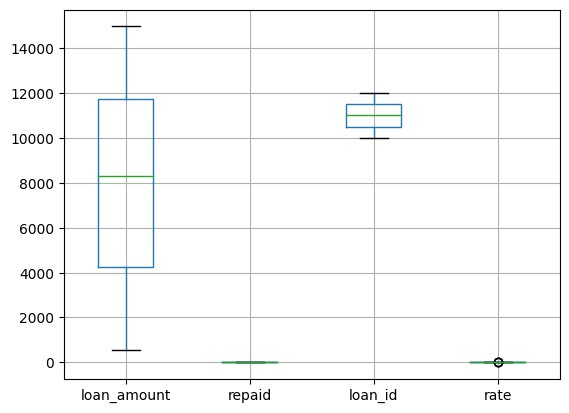

In [ ]:
df.boxplot()
plt.show()

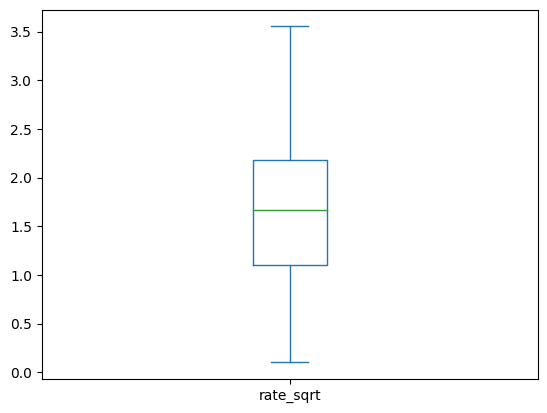

In [ ]:
# Treat the outlier using SQRT transformation
df['rate_sqrt'] = np.sqrt(df['rate'])

# Create a boxplot for the transformed column
df['rate_sqrt'].plot(kind='box')

# Show the plot
plt.show()

In [ ]:
# Treat the outlier using Z-Score
def cap_outliers_zscore(dataframe, column_name, z_threshold=3):
      # Calculate Z-Scores for the specified column
      z_scores = zscore(dataframe['rate'])

      # Identify outliers based on the threshold
      outliers = np.abs(z_scores) > z_threshold

      # Cap the outliers to the threshold value
      dataframe ['rate' + '_zscore_capped'] = np.where(outliers, z_threshold, dataframe['rate'])

      # Create a boxplot for the capped column
      dataframe['rate' + '_zscore_Capped'].plot(kind='box')

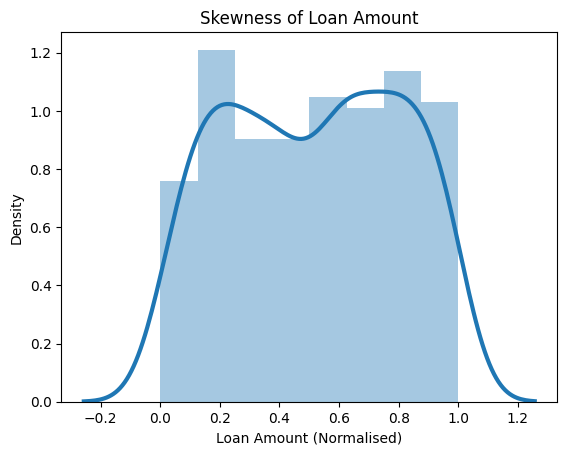

Skewness of Loan Amount: -0.04011522267119749
Kurtosis of Loan Amount: -1.2320989495947452


In [ ]:
# For 'loan_amount' and 'rate' are the numerical columns you want to scale
numerical_cols = ['loan_amount', 'rate']

#Step 2: Apply Min-Max Normalization
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#step 3: Calculate skewness and kurtosis for 'Loan Amount'
loan_amount_skewness = df['loan_amount'].skew()
loan_amount_kurtosis = df['loan_amount'].kurt()

# Step 4: Plot the skewness and kurtosis
# For skewness
sns.distplot(df['loan_amount'], hist=True, kde=True,
             kde_kws = {'shade': False, 'linewidth': 3},
             label = 'Skewness')

plt.title('Skewness of Loan Amount')
plt.xlabel('Loan Amount (Normalised)')
plt.ylabel('Density')
plt.show()

# Output the skewness and kurtosis values
print(f"Skewness of Loan Amount: {loan_amount_skewness}")
print(f"Kurtosis of Loan Amount: {loan_amount_kurtosis}")

In [ ]:
categorical_columns = ['repaid', 'loan_type'] # Add other categorical columns if necessary

# Apply one-hot encoding using pd.get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Show the first 5 rows of the encoded DataFrame
print(df_encoded.head())

           loan_amount  loan_id  loan_start    loan_end      rate  rate_sqrt  \
client_id                                                                      
46109         0.909867    10243  2002-04-16  2003-12-20  0.169707   1.466288   
46109         0.640785    10984  2003-10-21  2005-07-17  0.098335   1.118034   
46109         0.844782    10990  2006-02-01  2007-07-05  0.053132   0.824621   
46109         0.829795    10596  2010-12-08  2013-05-05  0.097542   1.113553   
46109         0.936026    11415  2010-07-07  2012-05-21  0.247423   1.769181   

           repaid_0  repaid_1  loan_type_cash  loan_type_credit  \
client_id                                                         
46109             1         0               0                 0   
46109             1         0               0                 1   
46109             0         1               0                 0   
46109             0         1               1                 0   
46109             0         1        

In [ ]:
# Convert 'loan_start' and 'loan_end' columns to datetime objects
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

# Calculate the tenure of the loan
df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days

# Display the first 5 rows with the new 'loan_tenure' column
print(df.head())


          loan_type  loan_amount  repaid  loan_id loan_start   loan_end  \
client_id                                                                 
46109          home     0.909867       0    10243 2002-04-16 2003-12-20   
46109        credit     0.640785       0    10984 2003-10-21 2005-07-17   
46109          home     0.844782       1    10990 2006-02-01 2007-07-05   
46109          cash     0.829795       1    10596 2010-12-08 2013-05-05   
46109        credit     0.936026       1    11415 2010-07-07 2012-05-21   

               rate  rate_sqrt  loan_tenure  
client_id                                    
46109      0.169707   1.466288          613  
46109      0.098335   1.118034          635  
46109      0.053132   0.824621          519  
46109      0.097542   1.113553          879  
46109      0.247423   1.769181          684  


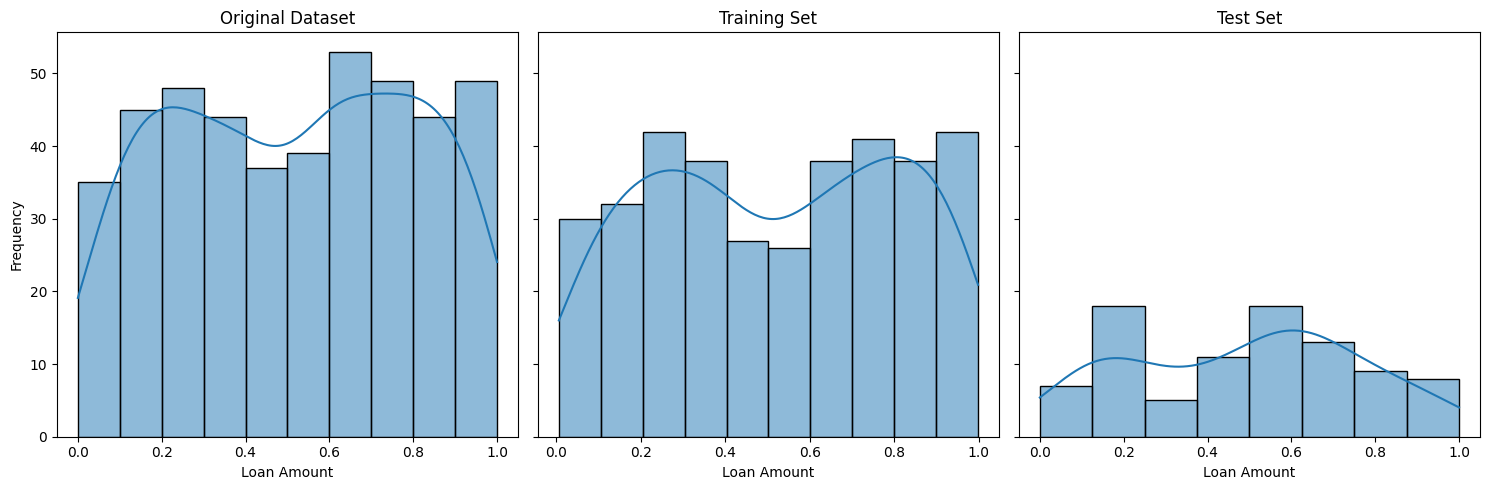

In [ ]:
# Separate features and target variable
X = df.drop('loan_amount', axis=1)
y = df['loan_amount']

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plotting the distribution of the target variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Original Dataset
sns.histplot(y, kde=True, ax=axes[0])
axes[0].set_title('Original Dataset')
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Frequency')

# Training Set
sns.histplot(y_train, kde=True, ax=axes[1])
axes[1].set_title('Training Set')
axes[1].set_xlabel('Loan Amount')
axes[1].set_ylabel('Frequency')

# Test Set
sns.histplot(y_test, kde=True, ax=axes[2])
axes[2].set_title('Test Set')
axes[2].set_xlabel('Loan Amount')
axes[2].set_ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()